<a href="https://colab.research.google.com/github/jtowgood/DAT490Capstone/blob/main/Unsupervised_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#Link google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
alcohol_path = "/content/drive/My Drive/alcohol_improved.csv"
income_path = "/content/drive/My Drive/income_improved.csv"
population_path = "/content/drive/My Drive/pop_improved.csv"

In [ ]:
# create dataframe for liquor sales, income, population size
df_alcohol = pd.read_csv(alcohol_path)
df_income = pd.read_csv(income_path)
df_population = pd.read_csv(population_path)

In [ ]:
df_alcohol.head()

,Date,Store Number,County,Category Name,Item Description,State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Month,Year
0,2018-11-28,2536,POLK,TENNESSEE WHISKIES,GENTLEMAN JACK,20.01,30.02,2,60.04,1.50,11,2018
1,2024-07-29,10165,SCOTT,NEUTRAL GRAIN SPIRITS FLAVORED,OLE SMOKY WHITE CHOCOLATE STRAWBERRY CREAM,13.00,19.50,1,19.50,0.75,7,2024
2,2019-11-08,5851,LOUISA,WHISKEY LIQUEUR,FIREBALL CINNAMON WHISKEY MINI DISPENSER,30.00,45.00,1,45.00,0.05,11,2019
3,2014-03-25,4490,LINN,TENNESSEE WHISKIES,JACK DANIELS OLD #7 BLACK LBL,14.04,21.05,3,63.15,2.25,3,2014
4,2020-08-18,2535,POLK,100% AGAVE TEQUILA,PATRON SILVER,27.50,41.25,1,41.25,0.75,8,2020


In [ ]:
from sklearn.cluster import KMeans

In [ ]:
#Get columns I need
df_alcohol_trimmed = df_alcohol[['County', 'Sale (Dollars)', 'Volume Sold (Liters)', 'State Bottle Cost', 'State Bottle Retail', 'Bottles Sold', 'Category Name']]
df_income_trimmed = df_income[['County', 'Average Income ($)']]
df_income_trimmed.head()
#Drop null values

df_alcohol_trimmed = df_alcohol_trimmed.dropna()
df_alcohol_trimmed.info()

# Make sure county names are formatted the same
df_income_trimmed['County'] = df_income_trimmed['County'].str.lower()
df_alcohol_trimmed['County'] = df_alcohol_trimmed['County'].str.lower()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 496944 entries, 0 to 496943
Data columns (total 7 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   County                496944 non-null  object 
 1   Sale (Dollars)        496944 non-null  float64
 2   Volume Sold (Liters)  496944 non-null  float64
 3   State Bottle Cost     496944 non-null  float64
 4   State Bottle Retail   496944 non-null  float64
 5   Bottles Sold          496944 non-null  int64  
 6   Category Name         496944 non-null  object 
dtypes: float64(4), int64(1), object(2)
memory usage: 26.5+ MB


<ipython-input-7-b645b440611d>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_income_trimmed['County'] = df_income_trimmed['County'].str.lower()


In [ ]:
# Join alcohol sales with income data
df_merged = df_income_trimmed.merge(df_alcohol_trimmed, on='County', how='inner')

# Add revenue from sale feature by subtracting cost from retail
df_merged['Revenue'] = df_merged['Sale (Dollars)'] - df_merged['State Bottle Cost'] * df_merged['Bottles Sold']
df_merged.head()

,County,Average Income ($),Sale (Dollars),Volume Sold (Liters),State Bottle Cost,State Bottle Retail,Bottles Sold,Category Name,Revenue
0,adair,54098.0,135.00,10.50,15.00,22.50,6,CANADIAN WHISKIES,45.00
1,adair,54098.0,20.25,0.75,13.50,20.25,1,IMPORTED DRY GINS,6.75
2,adair,54098.0,99.00,10.50,11.00,16.50,6,CANADIAN WHISKIES,33.00
3,adair,54098.0,70.56,10.50,7.84,11.76,6,WHITE RUM,23.52
4,adair,54098.0,24.12,4.00,3.85,6.03,4,AMERICAN COCKTAILS,8.72


In [ ]:
#Perform PCA on data
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Scale data using standard scaler
df_scaled = pd.DataFrame(scaler.fit_transform(df_merged[['Sale (Dollars)', 'Volume Sold (Liters)', 'State Bottle Cost', 'State Bottle Retail', 'Bottles Sold', 'Revenue']]))
#Convert to data frame


In [ ]:
#Do PCA
pca = PCA(n_components=2)
df_pca = pd.DataFrame(pca.fit_transform(df_scaled), columns=['PC1', 'PC2'])
df_pca.head()

,PC1,PC2
0,-0.044592,0.593957
1,-0.538208,0.420305
2,-0.162282,0.045786
3,-0.255258,-0.387270
4,-0.521071,-0.901773


In [ ]:
df_pca.shape

(496943, 2)

In [ ]:
#Use standard scaler
scaler = StandardScaler()
df_merged[['Sale (T)', 'Volume Sold (T)', 'State Bottle Cost (T)', 'State Bottle Retail (T)', 'Bottles Sold (T)', 'Revenue (T)']] = scaler.fit_transform(df_merged[['Sale (Dollars)', 'Volume Sold (Liters)', 'State Bottle Cost', 'State Bottle Retail', 'Bottles Sold', 'Revenue']])
df_merged.head()

,County,Average Income ($),Sale (Dollars),Volume Sold (Liters),State Bottle Cost,State Bottle Retail,Bottles Sold,Category Name,Revenue,Sale (T),Volume Sold (T),State Bottle Cost (T),State Bottle Retail (T),Bottles Sold (T),Revenue (T)
0,adair,54098.0,135.00,10.50,15.00,22.50,6,CANADIAN WHISKIES,45.00,-0.022236,0.041533,0.412480,0.411951,-0.172786,-0.022225
1,adair,54098.0,20.25,0.75,13.50,20.25,1,IMPORTED DRY GINS,6.75,-0.268907,-0.245560,0.266546,0.265991,-0.352127,-0.268408
2,adair,54098.0,99.00,10.50,11.00,16.50,6,CANADIAN WHISKIES,33.00,-0.099623,0.041533,0.023322,0.022726,-0.172786,-0.099459
3,adair,54098.0,70.56,10.50,7.84,11.76,6,WHITE RUM,23.52,-0.160758,0.041533,-0.284112,-0.284761,-0.172786,-0.160474
4,adair,54098.0,24.12,4.00,3.85,6.03,4,AMERICAN COCKTAILS,8.72,-0.260588,-0.149862,-0.672297,-0.656471,-0.244522,-0.255729


In [ ]:
# Cluster on Revenue and Total Sales

# Find optimal number of clusters using 'Elbow Method' (Got it from youtube channel "Andy McDonald")
def optimize_k_means(data, max_k):
    means = []
    inertias = []
    for k in range(1, max_k):
        kmeans = KMeans(n_clusters=k)
        kmeans.fit(data)

        means.append(k)
        inertias.append(kmeans.inertia_)


    # Generate the elbow plot
    fig = plt.figure(figsize=(10, 5))
    plt.plot(means, inertias, 'o-')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Inertia')
    plt.grid(True)
    plt.show()

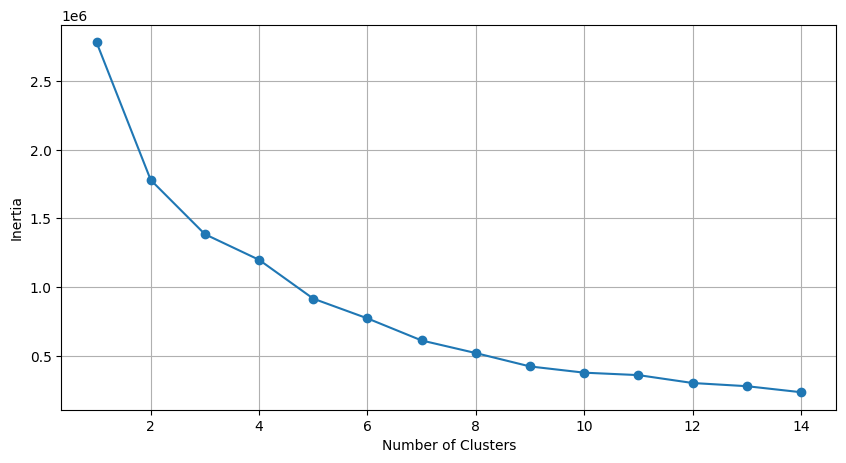

In [ ]:
#Run kmeans optimizer on pca
optimize_k_means(df_pca[['PC1', 'PC2']], 15)

In [ ]:
#Starts to level off at 6 so we are going to use 6 clusters for kmeans
kmeans = KMeans(n_clusters=6)
kmeans.fit(df_pca)
df_merged['Cluster_6'] = kmeans.labels_
df_merged.head()

,County,Average Income ($),Sale (Dollars),Volume Sold (Liters),State Bottle Cost,State Bottle Retail,Bottles Sold,Category Name,Revenue,Sale (T),Volume Sold (T),State Bottle Cost (T),State Bottle Retail (T),Bottles Sold (T),Revenue (T),Cluster_6
0,adair,54098.0,135.00,10.50,15.00,22.50,6,CANADIAN WHISKIES,45.00,-0.022236,0.041533,0.412480,0.411951,-0.172786,-0.022225,2
1,adair,54098.0,20.25,0.75,13.50,20.25,1,IMPORTED DRY GINS,6.75,-0.268907,-0.245560,0.266546,0.265991,-0.352127,-0.268408,0
2,adair,54098.0,99.00,10.50,11.00,16.50,6,CANADIAN WHISKIES,33.00,-0.099623,0.041533,0.023322,0.022726,-0.172786,-0.099459,0
3,adair,54098.0,70.56,10.50,7.84,11.76,6,WHITE RUM,23.52,-0.160758,0.041533,-0.284112,-0.284761,-0.172786,-0.160474,0
4,adair,54098.0,24.12,4.00,3.85,6.03,4,AMERICAN COCKTAILS,8.72,-0.260588,-0.149862,-0.672297,-0.656471,-0.244522,-0.255729,0


In [ ]:
df_pca['Cluster'] = kmeans.labels_
df_pca.head()

,PC1,PC2,Cluster
0,-0.044592,0.593957,2
1,-0.538208,0.420305,0
2,-0.162282,0.045786,0
3,-0.255258,-0.387270,0
4,-0.521071,-0.901773,0


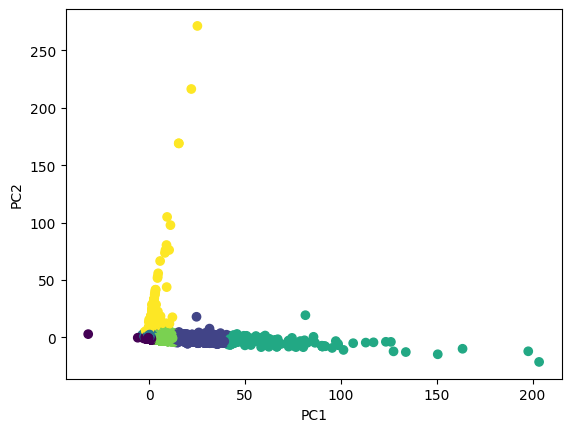

In [ ]:
#Plot the clusters
plt.scatter(df_pca['PC1'], df_pca['PC2'], c=df_pca['Cluster'], cmap='viridis')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

In [ ]:
#Summary statistics on the original data
non_scaled_columns1 = ['Sale (Dollars)', 'Volume Sold (Liters)', 'Cluster_6']
non_scaled_columns2 = ['State Bottle Cost', 'State Bottle Retail', 'Cluster_6']
non_scaled_columns3 = ['Bottles Sold', 'Revenue', 'Cluster_6']
df_merged[non_scaled_columns1].groupby('Cluster_6').describe()

Sale (Dollars)                                               \
                   count          mean          std      min      25%   
Cluster_6                                                               
0               376448.0     88.371032    82.724611 -4801.68    29.25   
1                  947.0   5523.344498  2153.103040   907.20  4104.00   
2               107156.0    184.826578   161.651230  -954.00    63.00   
3                  215.0  14437.298279  6477.455449  5578.56  9720.00   
4                 6971.0   1408.364113   809.460718   244.80   849.60   
5                 5206.0    192.645098   279.601379  -811.68    77.40   

                                          Volume Sold (Liters)               \
                50%         75%       max                count         mean   
Cluster_6                                                                     
0             67.50    119.4000    832.80             376448.0     6.924054   
1           5077.44   6509.7600  14037.60                947.0   384.746990   
2            140.16    270.0000   1440.00             107156.0     6.776894   
3          13014.00  16635.8400  51327.00                215.0  1038.503721   
4           1214.64   1735.2000   5040.00               6971.0    84.540511   
5             90.00    193.6925   4945.68               5206.0     1.394084   

                                                               
                  std    min     25%     50%      75%     max  
Cluster_6                                                      
0            7.198518 -648.0    1.50    4.80     9.60   105.0  
1          190.983279   37.5  240.00  324.00   525.00  1050.0  
2            6.701893  -42.0    1.75    4.50    10.50    63.0  
3          643.474723  126.0  660.00  945.00  1118.25  5376.0  
4           56.002954    4.8   45.00   72.00   105.00   409.5  
5            3.167796   -9.0    0.05    0.75     1.50   140.0

In [ ]:
df_merged[non_scaled_columns2].groupby('Cluster_6').describe()

State Bottle Cost                                             \
                      count       mean        std    min    25%    50%   
Cluster_6                                                                
0                  376448.0   7.333603   3.014006   0.00   5.00   7.35   
1                     947.0  13.994921   8.089152   0.90   8.99  12.67   
2                  107156.0  19.974236   5.900271  12.05  15.57  18.00   
3                     215.0  14.179767  10.095057   3.97   9.70  12.67   
4                    6971.0  12.320043   7.097291   0.89   7.58  11.55   
5                    5206.0  66.073909  54.467730  42.49  51.60  51.60   

                           State Bottle Retail                               \
              75%      max               count       mean        std    min   
Cluster_6                                                                     
0           9.520    16.33            376448.0  11.011556   4.524277   0.00   
1          18.475   137.88               947.0  21.012471  12.132368   1.35   
2          22.500    60.00            107156.0  29.964006   8.840820   7.74   
3          17.900   137.13               215.0  21.307395  15.148505   5.96   
4          15.990    62.46              6971.0  18.491921  10.644778   1.34   
5          65.000  2000.00              5206.0  99.112078  81.701778  63.74   

                                           
              25%    50%     75%      max  
Cluster_6                                  
0           7.500  11.03  14.460    22.61  
1          13.500  19.01  27.715   206.82  
2          23.360  27.00  33.750    64.50  
3          14.930  19.01  26.850   206.07  
4          11.365  17.33  23.990    93.69  
5          77.400  77.40  97.500  3000.00

In [ ]:
df_merged[non_scaled_columns3].groupby('Cluster_6').describe()

Bottles Sold                                                      \
                 count        mean         std    min    25%    50%    75%   
Cluster_6                                                                    
0             376448.0    9.369461   10.818679 -648.0    3.0    6.0   12.0   
1                947.0  310.466737  145.012538   50.0  216.0  288.0  360.0   
2             107156.0    6.566501    5.937199  -24.0    2.0    6.0   12.0   
3                215.0  759.427907  365.161714  168.0  582.0  660.0  852.0   
4               6971.0   97.143882   64.909040   24.0   60.0   72.0  120.0   
5               5206.0    1.980791    2.413940  -12.0    1.0    1.0    2.0   

                    Revenue                                              \
              max     count         mean          std      min      25%   
Cluster_6                                                                 
0           144.0  376448.0    29.492791    27.751797 -1600.56     9.75   
1           960.0     947.0  1837.453844   715.150270   302.40  1368.00   
2            50.0  107156.0    61.559874    54.118225  -438.60    21.00   
3          3072.0     215.0  4837.617209  2167.030935  1862.64  3240.00   
4           624.0    6971.0   469.042737   269.800767     0.00   282.24   
5            30.0    5206.0    63.305138    94.388379  -541.80    25.80   

                                       
               50%      75%       max  
Cluster_6                              
0            22.44    39.84    601.56  
1          1693.44  2160.30   4680.00  
2            46.74    90.00    480.00  
3          4320.00  5549.04  17118.00  
4           404.40   583.20   1680.00  
5            30.00    64.18   1654.56

In [ ]:
df_merged[['Average Income ($)', 'Cluster_6']].groupby('Cluster_6').describe()

Average Income ($)                                               \
                       count          mean          std      min      25%   
Cluster_6                                                                   
0                   376448.0  60927.804496  7004.528579  44440.0  55076.0   
1                      947.0  63304.902851  7851.591648  44440.0  57340.0   
2                   107156.0  61217.122933  7007.589928  44440.0  55454.0   
3                      215.0  65015.976744  7756.507812  46759.0  59375.0   
4                     6971.0  62908.105437  6894.398237  44440.0  57340.0   
5                     5206.0  62085.198809  7299.822424  44440.0  56632.0   

                                      
               50%      75%      max  
Cluster_6                             
0          61766.0  66626.0  86400.0  
1          63195.0  68238.0  86400.0  
2          61766.0  67281.0  86400.0  
3          66626.0  68238.0  86400.0  
4          63201.0  68238.0  86400.0  
5          62303.0  68238.0  86400.0

In [ ]:
#See how many records exist where bottle retail is 3000
df_merged[df_merged['State Bottle Retail'] == 3000]

,County,Average Income ($),Sale (Dollars),Volume Sold (Liters),State Bottle Cost,State Bottle Retail,Bottles Sold,Category Name,Revenue,Sale (T),Volume Sold (T),State Bottle Cost (T),State Bottle Retail (T),Bottles Sold (T),Revenue (T),Cluster_6
291714,polk,68238.0,3000.0,0.8,2000.0,3000.0,1,TEMPORARY & SPECIALTY PACKAGES,1000.0,6.136483,-0.244088,193.531958,193.564657,-0.352127,6.12431,5


In [ ]:
#How many counties in cluster 5
df_merged[df_merged['Cluster_6'] == 5]['County'].nunique()

99

In [ ]:
#Count top 10 in cluster 5
df_merged[df_merged['Cluster_6'] == 5]['County'].value_counts().head(10)

,count
County,
polk,1285
linn,420
scott,287
johnson,269
black hawk,260
pottawattamie,257
woodbury,181
story,157
dallas,123


In [ ]:
df_merged[df_merged['Cluster_6'] == 0]['County'].value_counts().head(10)

,count
County,
polk,67824
linn,31906
scott,22754
black hawk,21373
johnson,17933
pottawattamie,12748
woodbury,11609
story,11484
dubuque,10575


In [ ]:
df_merged[df_merged['Cluster_6'] == 1]['County'].value_counts().head(10)

,count
County,
polk,232
linn,100
scott,74
johnson,68
black hawk,59
dallas,49
pottawattamie,47
story,44
woodbury,42


In [ ]:
df_merged[df_merged['Cluster_6'] == 2]['County'].value_counts().head(10)

,count
County,
polk,20968
linn,8685
scott,6073
johnson,5918
black hawk,5625
story,3716
woodbury,3317
pottawattamie,3271
dubuque,3074


In [ ]:
df_merged[df_merged['Cluster_6'] == 3]['County'].value_counts().head(10)

,count
County,
polk,76
linn,17
dallas,15
johnson,14
scott,13
black hawk,9
pottawattamie,9
woodbury,7
dubuque,5


In [ ]:
df_merged[df_merged['Cluster_6'] == 4]['County'].value_counts().head(10)

,count
County,
polk,1968
linn,701
scott,699
johnson,458
black hawk,367
pottawattamie,304
woodbury,268
dubuque,225
story,176


In [ ]:
#How many counties in cluster 3
df_merged[df_merged['Cluster_6'] == 3]['County'].nunique()

36

In [ ]:
#List the count of these counties
df_merged[df_merged['Cluster_6'] == 3]['County'].value_counts()

,count
County,
polk,76
linn,17
dallas,15
johnson,14
scott,13
black hawk,9
pottawattamie,9
woodbury,7
dubuque,5


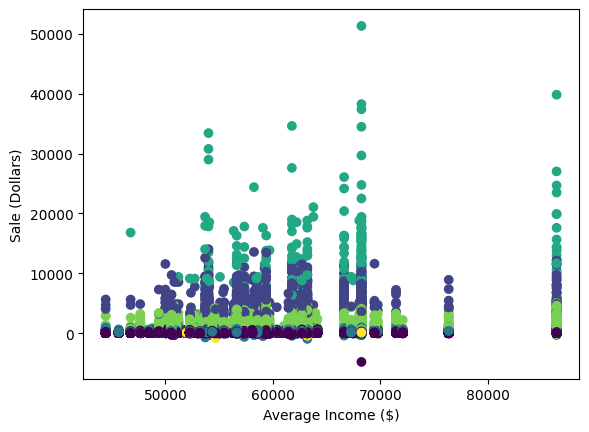

In [ ]:
#Plot Sales vs average income for each cluster
plt.scatter(df_merged['Average Income ($)'], df_merged['Sale (Dollars)'], c=df_merged['Cluster_6'], cmap='viridis')
plt.xlabel('Average Income ($)')
plt.ylabel('Sale (Dollars)')
plt.show()

In [ ]:
#Print average sale amount by cluster
df_merged[['Cluster_6', 'Sale (Dollars)']].groupby('Cluster_6').mean()


,Sale (Dollars)
Cluster_6,
0,88.371032
1,5523.344498
2,184.826578
3,14437.298279
4,1408.364113
5,192.645098


In [ ]:
#Export df_merged to my drive
df_merged.to_csv('/content/drive/My Drive/df_merged.csv', index=False)

In [ ]:
#Bring in pytorch for the autoencoder and construct it
import torch
import torch.nn as nn
import torch.optim as optim

#Autoencoder architecture

class TabularAutoencoder(nn.Module):
    def __init__(self, input_dim):
        super(TabularAutoencoder, self).__init__()

        # Encoder
        self.encoder = nn.Sequential(
            nn.Linear(input_dim, 16),
            nn.LeakyReLU(),
            nn.Linear(16, 8),
            nn.LeakyReLU(),
            nn.Linear(8, 4),
            nn.LeakyReLU(),
        )

        # Decoder
        self.decoder = nn.Sequential(
            nn.Linear(4, 8),           # Expand latent space
            nn.LeakyReLU(),
            nn.Linear(8, 16),          # Expand further
            nn.LeakyReLU(),
            nn.Linear(16, input_dim),
            nn.Sigmoid()
        )

    def forward(self, x):
        # Forward pass through encoder
        encoded = self.encoder(x)
        # Forward pass through decoder
        decoded = self.decoder(encoded)
        return decoded


In [ ]:
#Now let's scale the data
df_merged_og[['Sale (T)', 'Volume Sold (T)', 'State Bottle Cost (T)', 'State Bottle Retail (T)', 'Bottles Sold (T)', 'Revenue (T)']] = scaler.fit_transform(df_merged_og[['Sale (Dollars)', 'Volume Sold (Liters)', 'State Bottle Cost', 'State Bottle Retail', 'Bottles Sold', 'Revenue']])

<ipython-input-39-10a2ff8d5728>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_merged_og[['Sale (T)', 'Volume Sold (T)', 'State Bottle Cost (T)', 'State Bottle Retail (T)', 'Bottles Sold (T)', 'Revenue (T)']] = scaler.fit_transform(df_merged_og[['Sale (Dollars)', 'Volume Sold (Liters)', 'State Bottle Cost', 'State Bottle Retail', 'Bottles Sold', 'Revenue']])
<ipython-input-39-10a2ff8d5728>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_merged_og[['Sale (T)', 'Volume Sold (T)', 'State Bottle Cost (

In [ ]:
#List of the features that will actually be going into the autoencoder
scaled_list = ['Sale (T)', 'Volume Sold (T)', 'State Bottle Cost (T)', 'State Bottle Retail (T)', 'Bottles Sold (T)', 'Revenue (T)']

In [ ]:
from torch.utils.data import DataLoader, TensorDataset

# Create a tensor from the scaled data
X = torch.tensor(df_merged_og[scaled_list].values, dtype=torch.float32)

# Create DataLoader for batch training
batch_size = 32
dataset = TensorDataset(X)
data_loader = DataLoader(dataset, batch_size=batch_size, shuffle=True)

In [ ]:
# Loss function and Adam Opimizer
criterion = nn.MSELoss()

#Instantiate the autoencoder
model = TabularAutoencoder(input_dim=len(scaled_list))
#Adam Optimizer
optimizer = optim.Adam(model.parameters(), lr=0.01)

In [ ]:
# Now we train the autoencoder
num_epochs = 50  # You can adjust this
for epoch in range(num_epochs):
    running_loss = 0.0

    for batch in data_loader:
        inputs = batch[0]

        # Zero the gradients
        optimizer.zero_grad()

        # Forward pass
        outputs = model(inputs)
        loss = criterion(outputs, inputs)  # Compare the reconstruction with the input

        # Backward pass and optimize
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    # Print average loss per epoch
    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {running_loss/len(data_loader):.4f}")

Epoch [1/50], Loss: 0.7953
Epoch [2/50], Loss: 0.7857
Epoch [3/50], Loss: 0.7848
Epoch [4/50], Loss: 0.7851


KeyboardInterrupt: 